# Process single-day data

In [1]:
import os
import cv2
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt

# Input folder path
input_folder = './dataOneDay'


In [ ]:

# Initialize lists to store original and processed images
original_images = []
processed_images = []


In [ ]:

# Set minimum rain area threshold
min_rain_area = 10  # Adjust as needed

# Iterate through each image in the folder
for filename in sorted(os.listdir(input_folder)):
    # Check if the file is an image
    if filename.endswith('.png'):
        input_path = os.path.join(input_folder, filename)
        
        # Step 1: Read the image
        img = cv2.imread(input_path)
        if img is None:
            print(f"Error: Image {filename} failed to load, skipping this file.")
            continue
        
        # Step 2: Convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Step 3: Save the unprocessed grayscale image to original_images
        original_images.append(gray_img)
        
        # Step 4: Apply binary thresholding
        _, binary_img = cv2.threshold(gray_img, 30, 255, cv2.THRESH_BINARY)
        
        # Step 5: Remove small areas
        binary_img = morphology.remove_small_objects(binary_img.astype(bool), min_rain_area)
        binary_img = (binary_img * 255).astype(np.uint8)
        
        # Step 6: Apply mask
        processed_img = cv2.bitwise_and(gray_img, gray_img, mask=binary_img)
        
        # Step 7: Normalize
        normalized_img = (processed_img / 255.0)  # Normalize to 0-1 range
        
        # Add processed image to processed_images
        processed_images.append(normalized_img)

print("Image processing complete. `original_images` and `processed_images` data are ready.")


In [ ]:

# Iterate through each image in the folder
for filename in sorted(os.listdir(input_folder)):
    # Check if the file is an image
    if filename.endswith('.png'):
        input_path = os.path.join(input_folder, filename)
        
        # Step 1: Read the image
        img = cv2.imread(input_path)
        if img is None:
            print(f"Error: Image {filename} failed to load, skipping this file.")
            continue
        
        # Step 2: Convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Step 3: Save the unprocessed grayscale image to original_images
        original_images.append(gray_img)
        
        # Step 4: Apply binary thresholding
        _, binary_img = cv2.threshold(gray_img, 30, 255, cv2.THRESH_BINARY)
        
        # Step 5: Remove small areas
        binary_img = morphology.remove_small_objects(binary_img.astype(bool), min_rain_area)
        binary_img = (binary_img * 255).astype(np.uint8)
        
        # Step 6: Apply mask
        processed_img = cv2.bitwise_and(gray_img, gray_img, mask=binary_img)
        
        # Step 7: Normalize
        normalized_img = (processed_img / 255.0)  # Normalize to 0-1 range
        
        # Add processed image to processed_images
        processed_images.append(normalized_img)

print("Image processing complete. `original_images` and `processed_images` data are ready.")


# Pixel Value Distribution Histogram
Compare the pixel value distribution of the original and processed image sets to observe the impact of denoising and normalization.  
Use matplotlib to plot the histogram of pixel values to analyze changes in image brightness and contrast.  


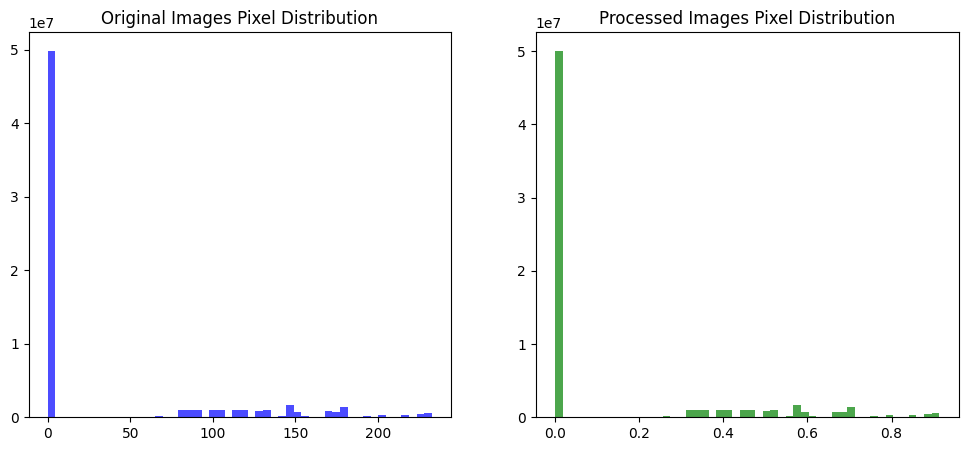

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Example: Display histograms of pixel distributions for original and processed images
def plot_histograms(original_images, processed_images):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # Pixel distribution of original images
    original_pixels = np.concatenate([img.ravel() for img in original_images])
    axs[0].hist(original_pixels, bins=50, color='blue', alpha=0.7)
    axs[0].set_title("Original Images Pixel Distribution")
    
    # Pixel distribution of processed images
    processed_pixels = np.concatenate([img.ravel() for img in processed_images])
    axs[1].hist(processed_pixels, bins=50, color='green', alpha=0.7)
    axs[1].set_title("Processed Images Pixel Distribution")
    
    plt.show()

# Example usage
plot_histograms(original_images, processed_images)


# Average Pixel Intensity Heatmap
Calculate the average pixel value for each image to generate a set of heatmaps, which show the overall location and intensity distribution of rainfall areas.  
Use numpy to compute the average pixel value for each image and plot it as a heatmap for visual representation of changes.  


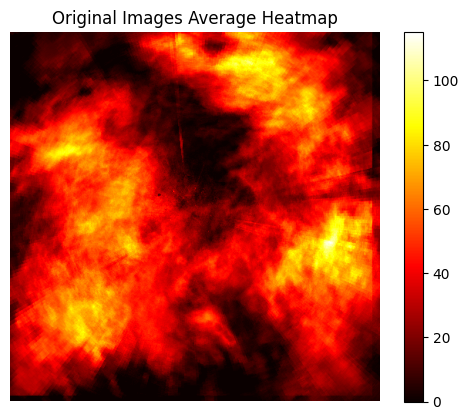

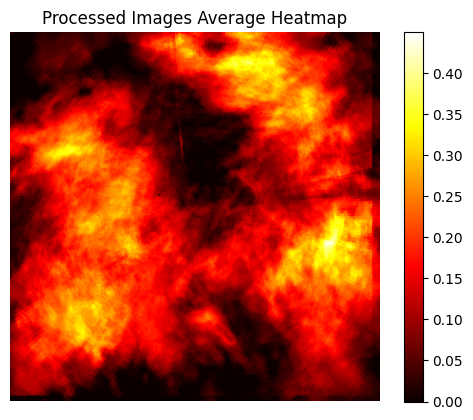

In [19]:
# Example: Generate an average pixel intensity heatmap
def plot_average_heatmap(images, title="Average Heatmap"):
    avg_img = np.mean(images, axis=0)  # Calculate the average image
    plt.imshow(avg_img, cmap='hot')
    plt.colorbar()
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_average_heatmap(original_images, title="Original Images Average Heatmap")
plot_average_heatmap(processed_images, title="Processed Images Average Heatmap")

# Difference Map of Pixel Value Changes
Calculate the difference between original and processed images to generate a difference map, highlighting areas with significant changes after denoising.  
Subtract the original image matrix from the processed image matrix, then visualize the difference areas.  


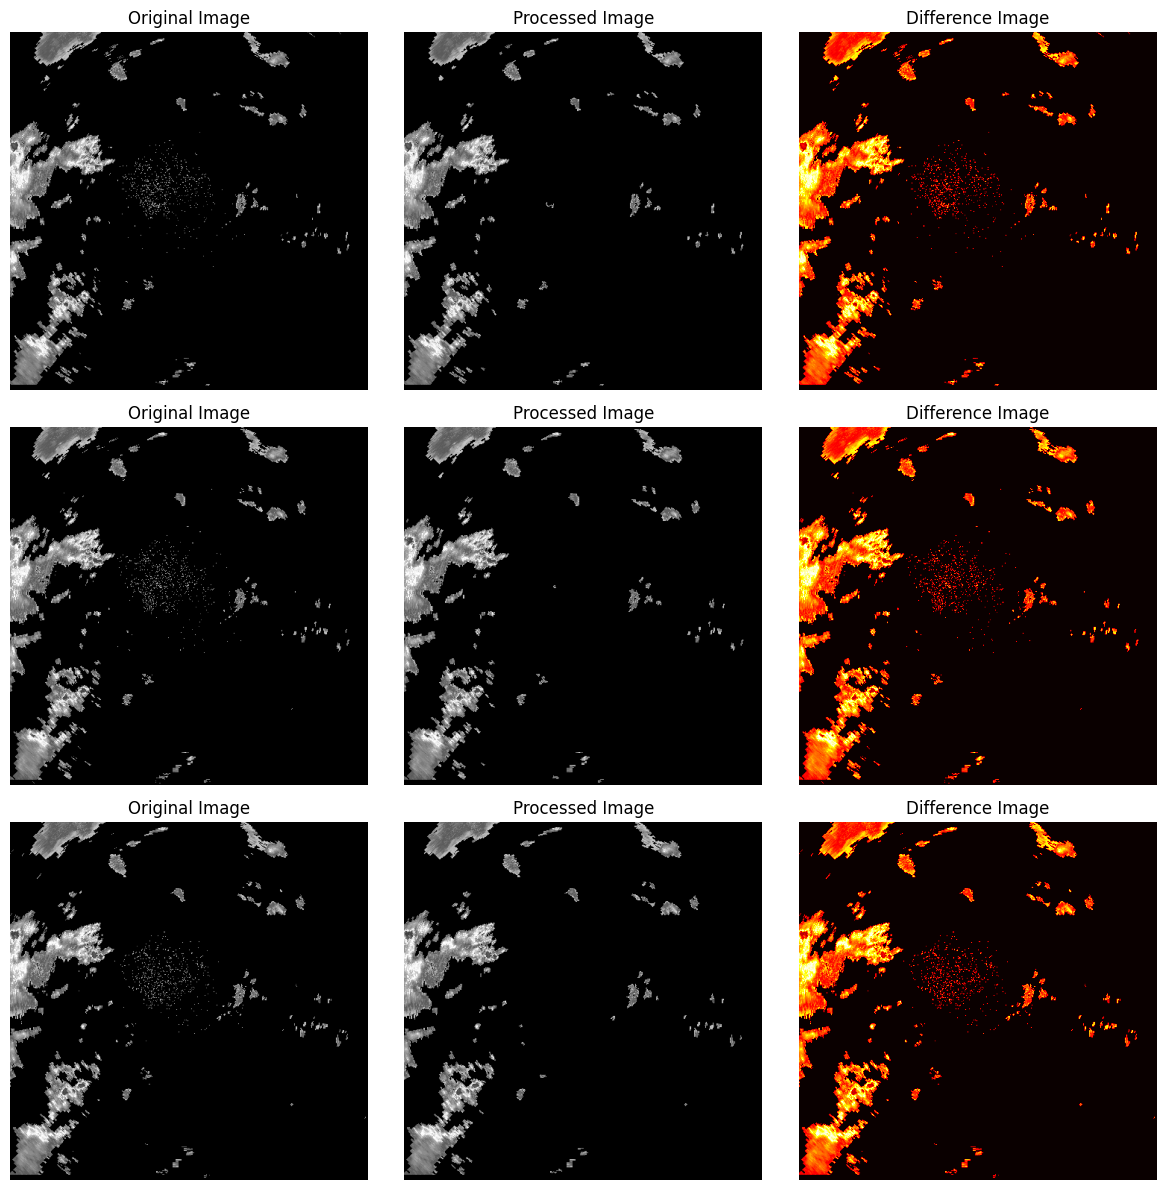

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_difference_images(original_images, processed_images, num_images=3):
    """
    Calculate and visualize the difference between original and processed images.

    Parameters:
    original_images (list of numpy arrays): Set of original images
    processed_images (list of numpy arrays): Set of processed images
    num_images (int): Number of difference images to display
    """
    fig, axs = plt.subplots(num_images, 3, figsize=(12, 4 * num_images))
    
    for i in range(num_images):
        original = original_images[i]
        processed = processed_images[i]
        
        # Calculate the difference image
        difference = np.abs(original - processed)
        
        # Visualize original image, processed image, and difference image
        axs[i, 0].imshow(original, cmap='gray')
        axs[i, 0].set_title("Original Image")
        axs[i, 0].axis('off')
        
        axs[i, 1].imshow(processed, cmap='gray')
        axs[i, 1].set_title("Processed Image")
        axs[i, 1].axis('off')
        
        axs[i, 2].imshow(difference, cmap='hot')
        axs[i, 2].set_title("Difference Image")
        axs[i, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
# original_images and processed_images are the sets of original and processed images (assumed to be loaded and processed)
plot_difference_images(original_images, processed_images, num_images=3)


# Rainfall Area Size Statistics
Calculate the size distribution of rainfall areas (effective rainfall) in each image, observing changes before and after processing.  
For each binarized image, compute the total pixel count of effective areas and plot a boxplot or distribution plot.  

**Note: Normalization is removed when comparing data here**


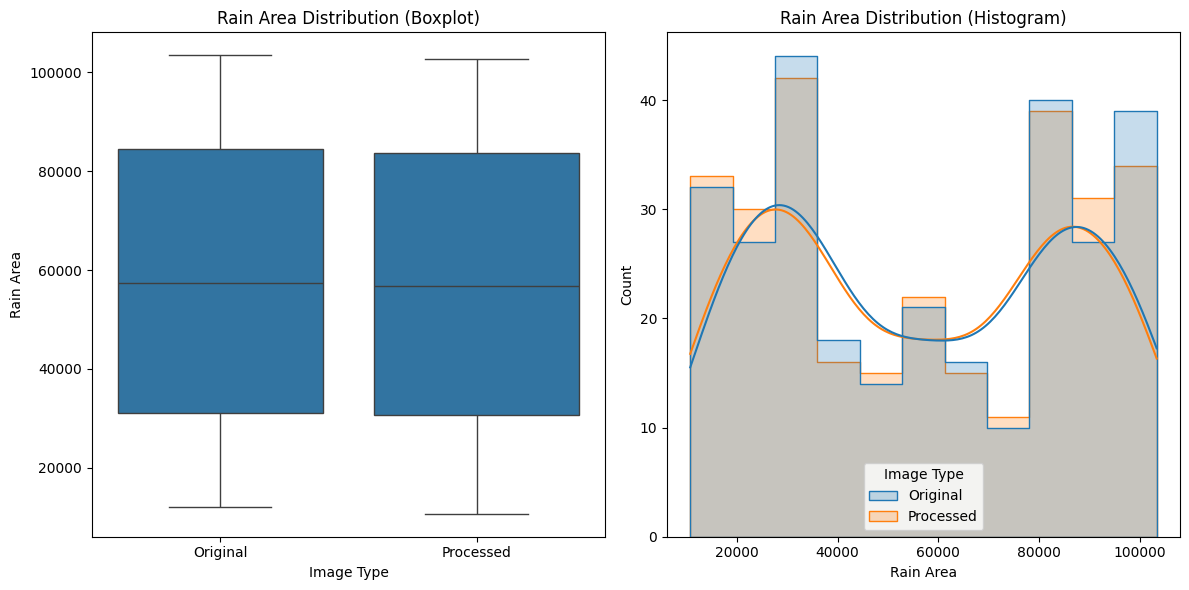

Original Images - Mean Rain Area: 57287.03472222222, Median Rain Area: 57389.5
Processed Images - Mean Rain Area: 56503.524305555555, Median Rain Area: 56737.5


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import morphology

def calculate_rain_area(image, threshold=30):
    """
    Calculate the total pixel count of the rainfall area in the image.
    
    Parameters:
    image (numpy array): Input grayscale image (not normalized)
    threshold (int): Threshold; pixels below this value are considered non-rainfall areas
    
    Returns:
    int: Total pixel count of the rainfall area
    """
    #  Restore image to original pixel range (if normalized)
    if image.max() <= 1.0:
        image = (image * 255).astype(np.uint8)
    
    #  Binarize image to obtain rainfall areas
    _, binary_img = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    rain_area = np.sum(binary_img > 0)
    return rain_area

def plot_rain_area_distribution(original_images, processed_images):
    """
    Calculate and visualize the size distribution of rainfall areas in images before and after processing.
    
    Parameters:
    original_images (list of numpy arrays): Set of original images (not normalized)
    processed_images (list of numpy arrays): Set of processed images (not normalized)
    """
    original_areas = [calculate_rain_area(img) for img in original_images]
    processed_areas = [calculate_rain_area(img) for img in processed_images]
    
    #  Create a DataFrame for easier visualization
    import pandas as pd
    data = pd.DataFrame({
        'Original': original_areas,
        'Processed': processed_areas
    })
    melted_data = pd.melt(data, var_name='Image Type', value_name='Rain Area')
    
    #  Plot boxplot and histogram for comparison
    plt.figure(figsize=(12, 6))

    #  Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Image Type', y='Rain Area', data=melted_data)
    plt.title("Rain Area Distribution (Boxplot)")
    
    #  Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data=melted_data, x='Rain Area', hue='Image Type', element="step", kde=True)
    plt.title("Rain Area Distribution (Histogram)")
    
    plt.tight_layout()
    plt.show()

    #  Display mean and median of rainfall area
    original_mean, processed_mean = np.mean(original_areas), np.mean(processed_areas)
    original_median, processed_median = np.median(original_areas), np.median(processed_areas)
    
    print(f"Original Images - Mean Rain Area: {original_mean}, Median Rain Area: {original_median}")
    print(f"Processed Images - Mean Rain Area: {processed_mean}, Median Rain Area: {processed_median}")

#  Example usage
#  original_images and processed_images are the sets of original and processed images (assumed to be loaded and processed)
plot_rain_area_distribution(original_images, processed_images)


#  Frequency Analysis (Fourier Transform)
Perform a Fourier Transform on original and processed images to observe differences in the frequency domain.  
#Denoising may impact the high-frequency components of the image.  
Use the numpy.fft library to perform the Fourier Transform and visualize the frequency distribution.  


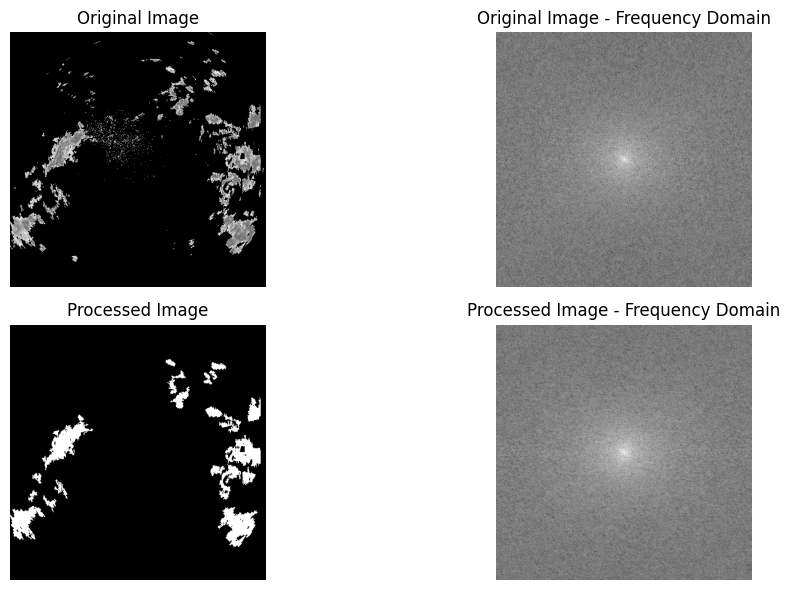

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_fourier_transform(original_image, processed_image):
    """
    Perform Fourier Transform on original and processed images and visualize the differences in the frequency domain.
    
    Parameters:
    original_image (numpy array): Original image
    processed_image (numpy array): Processed image
    """
    
    #  Define a Fourier Transform function
    def fourier_transform(image):
        #  Perform Fourier Transform
        f = np.fft.fft2(image)
        #  Shift the frequency center to the center of the image
        fshift = np.fft.fftshift(f)
        #  Logarithmic spectrum
        magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
        return magnitude_spectrum
    
    #  Frequency domain of the original image
    original_spectrum = fourier_transform(original_image)
    
    #  Frequency domain of the processed image
    processed_spectrum = fourier_transform(processed_image)
    
    #  Visualize the frequency domain
    plt.figure(figsize=(12, 6))
    
    #  Display the original image and its frequency domain
    plt.subplot(2, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.imshow(original_spectrum, cmap='gray')
    plt.title("Original Image - Frequency Domain")
    plt.axis('off')
    
    #  Display the processed image and its frequency domain
    plt.subplot(2, 2, 3)
    plt.imshow(processed_image, cmap='gray')
    plt.title("Processed Image")
    plt.axis('off')
    
    plt.subplot(2, 2, 4)
    plt.imshow(processed_spectrum, cmap='gray')
    plt.title("Processed Image - Frequency Domain")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

#  Example usage
#  original_image and processed_image are the original and processed images (assumed to be loaded)
#  Read and preprocess the image
input_path = './dataOneDayTest/dpsri_240km_2024100700150000dBR.dpsri.png'
img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

#  Example of original and processed images
original_image = img
processed_image = morphology.remove_small_objects(img.astype(bool), min_size=115).astype(np.uint8) * 255

#  Visualize the frequency domain differences
plot_fourier_transform(original_image, processed_image)


#  Structural Similarity Index (SSIM)
  Use the SSIM metric to compare original and processed images, quantifying the structural similarity to see if the structure of rainfall areas is preserved.  
  skimage.metrics.structural_similarity can help calculate the SSIM value, showing the impact of processing on structure.  
  Calculate the mean SSIM for all compared images.  


In [29]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np

#  Initialize SSIM values list
ssim_values = []

#  Iterate over each pair of original and processed images
for idx, (original, processed) in enumerate(zip(original_images, processed_images)):
    #  Normalize the original image to 0-1 to match the processed image
    original_normalized = original / 255.0
    
    #  Calculate SSIM; data_range=1 indicates we are comparing within the 0-1 range
    ssim_value = ssim(original_normalized, processed, data_range=1)
    ssim_values.append(ssim_value)
    
    #  Output the SSIM value for each image
    #  print(f"Image {idx+1} SSIM: {ssim_value}")

#  Calculate the mean SSIM for all images
mean_ssim = np.mean(ssim_values)

#  Output the average SSIM value
print(f"\nAverage SSIM across all images: {mean_ssim}")



Average SSIM across all images: 0.9607986646932594
